# Analysis of Requirements Survey responses

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
sns.set_style("white")

## Load responses

In [2]:
df = pd.read_csv("data/responses.csv")
df

,ID,Start time,Completion time,Geschlecht,Alter,Arbeitserfahrung als ErnährungsberaterIn (in Jahren),Wie viele Patienten betreuen Sie durchschnittlich pro Monat?\n,Wie häufig nutzen Sie bereits Software Applikationen in ihrem Arbeitsalltag,Welche Ernährungsrichtlinien verwenden Sie in Ihren Beratungen?\n,"Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen",...,Allergene in der Zutatenliste,Gesamte Zutatenliste,Preis pro Produkt,Preis pro 100g/100ml Produkt,Produktgröße,Nutri-Score,NOVA-Score (zur Angabe des Verarbeitungsgrads der Produkte),"Nachhaltigkeitsinformationen, z. B. CO2-Emissionen","Gibt es weitere Informationen, die Ihnen für die Empfehlung spezifischer Lebensmittel wichtig wären?","Gibt es noch etwas, das Sie bezüglich Ihrer Erfahrungen und Bedürfnisse als ErnährungsberaterIn mitteilen möchten?\n"
0,1,5/28/24 20:47:20,5/28/24 21:14:01,weiblich,46,12,50-60,3,Guidelines für klinische Ernährung z.B. von ES...,Gering,...,Neutral,Wichtig,Unwichtig,Unwichtig,Neutral,Neutral,Wichtig,Wichtig,Bei den Mikronährstoffen wären mir vor allem d...,"Ich habe mir überlegt, ob es für dieses Projek..."
1,2,5/29/24 10:27:51,5/29/24 10:38:33,weiblich,30,3,60,1,Dokumente des SVDE,Gering,...,Wichtig,Wichtig,Wichtig,Wichtig,Wichtig,Sehr unwichtig,Sehr unwichtig,Wichtig,nein,NaN
2,3,6/6/24 13:48:22,6/6/24 13:59:10,weiblich,31,5,30-50,2,SGE; GESKES; DGE; ESPEN; usw,Neutral,...,Wichtig,Neutral,Neutral,Wichtig,Wichtig,Sehr unwichtig,Neutral,Sehr wichtig,-,NaN
3,4,6/6/24 15:48:03,6/6/24 16:05:15,weiblich,40,2,120,5,Richtlinien der WHO,Gering,...,Sehr wichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Neutral,Wichtig,Wichtig,-,"Ich finde die Idee sehr gut, das man mithilfe ..."
4,5,6/12/24 6:58:34,6/12/24 7:19:55,weiblich,30,7,45,1,"Diverse, je nach Fachgebiet andere ESPEN, DGM,...",Sehr gering,...,Neutral,Sehr wichtig,Unwichtig,Unwichtig,Sehr wichtig,Unwichtig,Neutral,Unwichtig,Angaben auf 100g und Angaben auf Standardportion,Möglichkeit die Plattform bei Gebrauch anzupassen
5,6,6/12/24 8:12:38,6/12/24 8:22:01,weiblich,28,4,60,1,"je nach Thema, div. Guidelines der ESPEN oder ...",Neutral,...,Wichtig,Wichtig,Neutral,Neutral,Wichtig,Sehr unwichtig,Neutral,Neutral,-,-
6,7,6/12/24 9:52:05,6/12/24 10:02:31,weiblich,28,inkl. Abschlusspraktikum 1.5 Jahre,80,3,je nach Beratung Guidelines ESPEN etc. SGE etc.,Gering,...,Neutral,Sehr wichtig,Wichtig,Wichtig,Neutral,Neutral,Neutral,Neutral,-,NaN
7,8,6/12/24 10:47:01,6/12/24 11:13:52,weiblich,57,36,120,3,"Gesunde, ausgewogene Ernährung zur Gewichtsred...",Gering,...,Neutral,Unwichtig,Neutral,Neutral,Wichtig,Neutral,Neutral,Neutral,Getränke,"Grundsätzlich ein wertvolles Hilfsmittel, müss..."
8,9,6/12/24 9:52:15,6/12/24 14:05:31,weiblich,30,3 Jahre,150-200,3,diverse evidenzbasierte Ernährungsrichtlinien,Sehr gering,...,Wichtig,Wichtig,Wichtig,Neutral,Wichtig,Sehr unwichtig,Neutral,Neutral,-,NaN
9,10,6/12/24 13:05:53,6/12/24 17:10:22,weiblich,36,11,20,1,div. u.a. ESPEN-Guidelines,Sehr gering,...,Neutral,Wichtig,Unwichtig,Sehr unwichtig,Unwichtig,Sehr unwichtig,Sehr unwichtig,Unwichtig,Herkunft des Produkts,Eine solche Plattform wäre enorm wertvoll und ...


In [3]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Geschlecht', 'Alter',
       'Arbeitserfahrung als ErnährungsberaterIn (in Jahren)',
       'Wie viele Patienten betreuen Sie durchschnittlich pro Monat?\n',
       'Wie häufig nutzen Sie bereits Software Applikationen in ihrem Arbeitsalltag',
       'Welche Ernährungsrichtlinien verwenden Sie in Ihren Beratungen?\n',
       'Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der etwa die Hälfte (~50%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der ein Grossteil (~75%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der alle (100%) Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Falls keine Ihrer Bewertungen "Hoch" oder "Sehr hoch" ist - Was sind Ihre Gründe dafür?',
       'Bei einer Person, von der 1 Monat der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei

In [4]:
def apply_value_mappings(survey_df, cols, column_index_mappings):
    # Apply the mapping to each specified column
    for col in cols:
        if col in survey_df.columns:
            # Flatten values by converting to lowercase and stripping whitespace
            survey_df[col] = survey_df[col].astype(str).str.lower().str.strip()
            # Replace values according to the value_mappings
            survey_df[col] = survey_df[col].replace(value_mappings)
    
    return survey_df

## Food Purchase Data Coverage for Single- and Multi-Person Household Patients

In [ ]:
value_mappings = {
    "sehr gering": 1, 
    "gering": 2, 
    "neutral": 3, 
    "hoch": 4, 
    "sehr hoch": 5
}

In [5]:
coverage_single = ['Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der etwa die Hälfte (~50%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der ein Grossteil (~75%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der alle (100%) Lebensmittel-Einkaufsdaten zur Verfügung stehen']

coverage_multi = ['Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen2',
       'Bei einer Person, von der etwa die Hälfte (~50%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen2',
       'Bei einer Person, von der ein Grossteil (~75%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen2',
       'Bei einer Person, von der alle (100%) Lebensmittel-Einkaufsdaten zur Verfügung stehen2']

apply_value_mappings(df, coverage_single, value_mappings)
apply_value_mappings(df, coverage_multi, value_mappings)
df

/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

,ID,Start time,Completion time,Geschlecht,Alter,Arbeitserfahrung als ErnährungsberaterIn (in Jahren),Wie viele Patienten betreuen Sie durchschnittlich pro Monat?\n,Wie häufig nutzen Sie bereits Software Applikationen in ihrem Arbeitsalltag,Welche Ernährungsrichtlinien verwenden Sie in Ihren Beratungen?\n,"Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen",...,Allergene in der Zutatenliste,Gesamte Zutatenliste,Preis pro Produkt,Preis pro 100g/100ml Produkt,Produktgröße,Nutri-Score,NOVA-Score (zur Angabe des Verarbeitungsgrads der Produkte),"Nachhaltigkeitsinformationen, z. B. CO2-Emissionen","Gibt es weitere Informationen, die Ihnen für die Empfehlung spezifischer Lebensmittel wichtig wären?","Gibt es noch etwas, das Sie bezüglich Ihrer Erfahrungen und Bedürfnisse als ErnährungsberaterIn mitteilen möchten?\n"
0,1,5/28/24 20:47:20,5/28/24 21:14:01,weiblich,46,12,50-60,3,Guidelines für klinische Ernährung z.B. von ES...,2,...,Neutral,Wichtig,Unwichtig,Unwichtig,Neutral,Neutral,Wichtig,Wichtig,Bei den Mikronährstoffen wären mir vor allem d...,"Ich habe mir überlegt, ob es für dieses Projek..."
1,2,5/29/24 10:27:51,5/29/24 10:38:33,weiblich,30,3,60,1,Dokumente des SVDE,2,...,Wichtig,Wichtig,Wichtig,Wichtig,Wichtig,Sehr unwichtig,Sehr unwichtig,Wichtig,nein,NaN
2,3,6/6/24 13:48:22,6/6/24 13:59:10,weiblich,31,5,30-50,2,SGE; GESKES; DGE; ESPEN; usw,3,...,Wichtig,Neutral,Neutral,Wichtig,Wichtig,Sehr unwichtig,Neutral,Sehr wichtig,-,NaN
3,4,6/6/24 15:48:03,6/6/24 16:05:15,weiblich,40,2,120,5,Richtlinien der WHO,2,...,Sehr wichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Neutral,Wichtig,Wichtig,-,"Ich finde die Idee sehr gut, das man mithilfe ..."
4,5,6/12/24 6:58:34,6/12/24 7:19:55,weiblich,30,7,45,1,"Diverse, je nach Fachgebiet andere ESPEN, DGM,...",1,...,Neutral,Sehr wichtig,Unwichtig,Unwichtig,Sehr wichtig,Unwichtig,Neutral,Unwichtig,Angaben auf 100g und Angaben auf Standardportion,Möglichkeit die Plattform bei Gebrauch anzupassen
5,6,6/12/24 8:12:38,6/12/24 8:22:01,weiblich,28,4,60,1,"je nach Thema, div. Guidelines der ESPEN oder ...",3,...,Wichtig,Wichtig,Neutral,Neutral,Wichtig,Sehr unwichtig,Neutral,Neutral,-,-
6,7,6/12/24 9:52:05,6/12/24 10:02:31,weiblich,28,inkl. Abschlusspraktikum 1.5 Jahre,80,3,je nach Beratung Guidelines ESPEN etc. SGE etc.,2,...,Neutral,Sehr wichtig,Wichtig,Wichtig,Neutral,Neutral,Neutral,Neutral,-,NaN
7,8,6/12/24 10:47:01,6/12/24 11:13:52,weiblich,57,36,120,3,"Gesunde, ausgewogene Ernährung zur Gewichtsred...",2,...,Neutral,Unwichtig,Neutral,Neutral,Wichtig,Neutral,Neutral,Neutral,Getränke,"Grundsätzlich ein wertvolles Hilfsmittel, müss..."
8,9,6/12/24 9:52:15,6/12/24 14:05:31,weiblich,30,3 Jahre,150-200,3,diverse evidenzbasierte Ernährungsrichtlinien,1,...,Wichtig,Wichtig,Wichtig,Neutral,Wichtig,Sehr unwichtig,Neutral,Neutral,-,NaN
9,10,6/12/24 13:05:53,6/12/24 17:10:22,weiblich,36,11,20,1,div. u.a. ESPEN-Guidelines,1,...,Neutral,Wichtig,Unwichtig,Sehr unwichtig,Unwichtig,Sehr unwichtig,Sehr unwichtig,Unwichtig,Herkunft des Produkts,Eine solche Plattform wäre enorm wertvoll und ...


In [6]:
# Creating the single household DataFrame
df_coverage_single = df[coverage_single].copy()
df_coverage_single['household'] = "Single-Household"

# Creating the multi household DataFrame
df_coverage_multi = df[coverage_multi].copy()
df_coverage_multi['household'] = "Multi-Household"

# Rename columns in multi-household DataFrame to match single-household for concatenation
df_coverage_multi.columns = df_coverage_single.columns

# Concatenate both DataFrames into df_coverage
df_coverage = pd.concat([df_coverage_single, df_coverage_multi], ignore_index=True)
df_coverage = df_coverage[['household'] + [col for col in df_coverage.columns if col != 'household']]
df_coverage

,household,"Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der etwa die Hälfte (~50%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der ein Grossteil (~75%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der alle (100%) Lebensmittel-Einkaufsdaten zur Verfügung stehen"
0,Single-Household,2,3,4,4
1,Single-Household,2,2,4,5
2,Single-Household,3,4,4,5
3,Single-Household,2,3,4,4
4,Single-Household,1,1,4,4
5,Single-Household,3,3,4,4
6,Single-Household,2,2,3,4
7,Single-Household,2,3,4,4
8,Single-Household,1,1,2,3
9,Single-Household,1,2,4,5


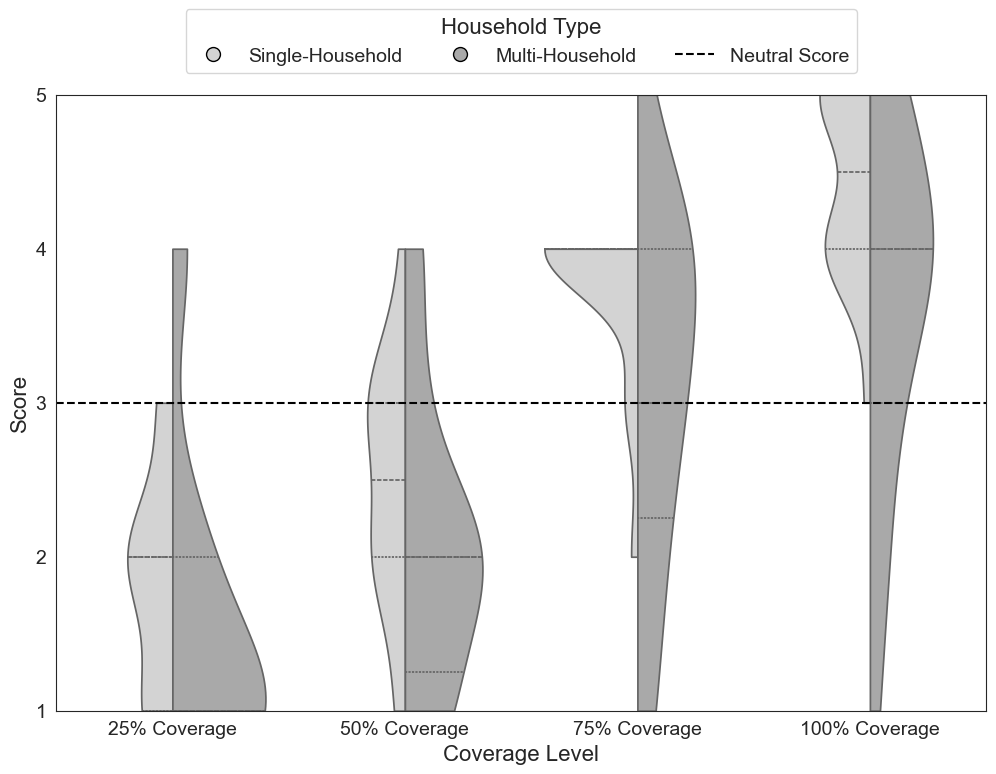

In [31]:
# Define a color palette for single and multi-households
palette = {"Single-Household": "lightgray", "Multi-Household": "darkgray"}

# Update font sizes for readability
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 16
})

# Melt the df_coverage DataFrame for plotting
df_coverage_melted = df_coverage.melt(
    id_vars=["household"],
    var_name="Coverage Level",
    value_name="Score"
)

plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_coverage_melted,
    x="Coverage Level",
    y="Score",
    hue="household",
    palette=palette,
    split=True,
    inner="quart",
    cut=0
)

# Set y-axis limits and integer ticks
plt.ylim(1, 5)
plt.yticks([1, 2, 3, 4, 5])  # Set y-ticks to integers only

# Add a horizontal line at the neutral score
plt.axhline(3, color="black", linestyle="--", linewidth=1.5)

# Update x-axis labels for readability
plt.xlabel("Coverage Level")
plt.ylabel("Score")
plt.xticks(ticks=plt.xticks()[0], labels=[
    "25% Coverage", "50% Coverage", "75% Coverage", "100% Coverage"
])

# Remove duplicate legend entries and add custom legend elements
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Household Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add legend elements manually
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Single-Household', markerfacecolor='lightgray', markersize=10, markeredgecolor="black"),
    Line2D([0], [0], marker='o', color='w', label='Multi-Household', markerfacecolor='darkgray', markersize=10, markeredgecolor="black"),
    Line2D([0], [0], color="black", linestyle="--", linewidth=1.5, label="Neutral Score"),
]
plt.legend(handles=legend_elements, title="Household Type", bbox_to_anchor=(0.5, 1.02), loc='lower center', ncol=3)

plt.show()

In [8]:
df_coverage[df_coverage["household"] != "Single-Household"].describe().round(2)

,"Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der etwa die Hälfte (~50%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der ein Grossteil (~75%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der alle (100%) Lebensmittel-Einkaufsdaten zur Verfügung stehen"
count,18.00,18.00,18.00,18.00
mean,1.56,2.06,3.11,3.67
std,0.98,0.94,1.13,1.14
min,1.00,1.00,1.00,1.00
25%,1.00,1.25,2.25,3.00
50%,1.00,2.00,3.00,4.00
75%,2.00,2.00,4.00,4.00
max,4.00,4.00,5.00,5.00


In [9]:
df_coverage[df_coverage["household"] != "Multi-Household"].describe().round(2)

,"Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der etwa die Hälfte (~50%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der ein Grossteil (~75%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der alle (100%) Lebensmittel-Einkaufsdaten zur Verfügung stehen"
count,18.00,18.00,18.00,18.00
mean,1.83,2.44,3.78,4.44
std,0.71,0.78,0.55,0.62
min,1.00,1.00,2.00,3.00
25%,1.00,2.00,4.00,4.00
50%,2.00,2.50,4.00,4.50
75%,2.00,3.00,4.00,5.00
max,3.00,4.00,4.00,5.00


## Food Purchase Data Tracking Period for Single- and Multi-Person Household Patients

In [10]:
timerange_single = ['Bei einer Person, von der 1 Monat der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der 3 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen',
       'Bei einer Person, von der 6 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen']

timerange_multi = ['Bei einer Person, von der 1 Monat der Lebensmittel-Einkaufsdaten zur Verfügung stehen2',
       'Bei einer Person, von der 3 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen2',
       'Bei einer Person, von der 6 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen2']

apply_value_mappings(df, timerange_single, value_mappings)
apply_value_mappings(df, timerange_multi, value_mappings)
df

/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

,ID,Start time,Completion time,Geschlecht,Alter,Arbeitserfahrung als ErnährungsberaterIn (in Jahren),Wie viele Patienten betreuen Sie durchschnittlich pro Monat?\n,Wie häufig nutzen Sie bereits Software Applikationen in ihrem Arbeitsalltag,Welche Ernährungsrichtlinien verwenden Sie in Ihren Beratungen?\n,"Bei einer Person, von der ein kleiner Teil (~25%) der Lebensmittel-Einkaufsdaten zur Verfügung stehen",...,Allergene in der Zutatenliste,Gesamte Zutatenliste,Preis pro Produkt,Preis pro 100g/100ml Produkt,Produktgröße,Nutri-Score,NOVA-Score (zur Angabe des Verarbeitungsgrads der Produkte),"Nachhaltigkeitsinformationen, z. B. CO2-Emissionen","Gibt es weitere Informationen, die Ihnen für die Empfehlung spezifischer Lebensmittel wichtig wären?","Gibt es noch etwas, das Sie bezüglich Ihrer Erfahrungen und Bedürfnisse als ErnährungsberaterIn mitteilen möchten?\n"
0,1,5/28/24 20:47:20,5/28/24 21:14:01,weiblich,46,12,50-60,3,Guidelines für klinische Ernährung z.B. von ES...,2,...,Neutral,Wichtig,Unwichtig,Unwichtig,Neutral,Neutral,Wichtig,Wichtig,Bei den Mikronährstoffen wären mir vor allem d...,"Ich habe mir überlegt, ob es für dieses Projek..."
1,2,5/29/24 10:27:51,5/29/24 10:38:33,weiblich,30,3,60,1,Dokumente des SVDE,2,...,Wichtig,Wichtig,Wichtig,Wichtig,Wichtig,Sehr unwichtig,Sehr unwichtig,Wichtig,nein,NaN
2,3,6/6/24 13:48:22,6/6/24 13:59:10,weiblich,31,5,30-50,2,SGE; GESKES; DGE; ESPEN; usw,3,...,Wichtig,Neutral,Neutral,Wichtig,Wichtig,Sehr unwichtig,Neutral,Sehr wichtig,-,NaN
3,4,6/6/24 15:48:03,6/6/24 16:05:15,weiblich,40,2,120,5,Richtlinien der WHO,2,...,Sehr wichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Neutral,Wichtig,Wichtig,-,"Ich finde die Idee sehr gut, das man mithilfe ..."
4,5,6/12/24 6:58:34,6/12/24 7:19:55,weiblich,30,7,45,1,"Diverse, je nach Fachgebiet andere ESPEN, DGM,...",1,...,Neutral,Sehr wichtig,Unwichtig,Unwichtig,Sehr wichtig,Unwichtig,Neutral,Unwichtig,Angaben auf 100g und Angaben auf Standardportion,Möglichkeit die Plattform bei Gebrauch anzupassen
5,6,6/12/24 8:12:38,6/12/24 8:22:01,weiblich,28,4,60,1,"je nach Thema, div. Guidelines der ESPEN oder ...",3,...,Wichtig,Wichtig,Neutral,Neutral,Wichtig,Sehr unwichtig,Neutral,Neutral,-,-
6,7,6/12/24 9:52:05,6/12/24 10:02:31,weiblich,28,inkl. Abschlusspraktikum 1.5 Jahre,80,3,je nach Beratung Guidelines ESPEN etc. SGE etc.,2,...,Neutral,Sehr wichtig,Wichtig,Wichtig,Neutral,Neutral,Neutral,Neutral,-,NaN
7,8,6/12/24 10:47:01,6/12/24 11:13:52,weiblich,57,36,120,3,"Gesunde, ausgewogene Ernährung zur Gewichtsred...",2,...,Neutral,Unwichtig,Neutral,Neutral,Wichtig,Neutral,Neutral,Neutral,Getränke,"Grundsätzlich ein wertvolles Hilfsmittel, müss..."
8,9,6/12/24 9:52:15,6/12/24 14:05:31,weiblich,30,3 Jahre,150-200,3,diverse evidenzbasierte Ernährungsrichtlinien,1,...,Wichtig,Wichtig,Wichtig,Neutral,Wichtig,Sehr unwichtig,Neutral,Neutral,-,NaN
9,10,6/12/24 13:05:53,6/12/24 17:10:22,weiblich,36,11,20,1,div. u.a. ESPEN-Guidelines,1,...,Neutral,Wichtig,Unwichtig,Sehr unwichtig,Unwichtig,Sehr unwichtig,Sehr unwichtig,Unwichtig,Herkunft des Produkts,Eine solche Plattform wäre enorm wertvoll und ...


In [11]:
# Creating the single-household DataFrame for timerange
df_timerange_single = df[timerange_single].copy()
df_timerange_single['household'] = "Single-Household"

# Creating the multi-household DataFrame for timerange
df_timerange_multi = df[timerange_multi].copy()
df_timerange_multi['household'] = "Multi-Household"

# Rename columns in the multi-household DataFrame to match single-household columns for concatenation
df_timerange_multi.columns = df_timerange_single.columns

# Concatenate both DataFrames into df_timerange
df_timerange = pd.concat([df_timerange_single, df_timerange_multi], ignore_index=True)
df_timerange = df_timerange[['household'] + [col for col in df_timerange.columns if col != 'household']]
df_timerange

,household,"Bei einer Person, von der 1 Monat der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 3 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 6 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen"
0,Single-Household,3,4,4
1,Single-Household,4,3,2
2,Single-Household,4,5,5
3,Single-Household,2,3,4
4,Single-Household,5,5,5
5,Single-Household,3,4,4
6,Single-Household,4,5,5
7,Single-Household,4,4,4
8,Single-Household,1,1,1
9,Single-Household,4,5,5


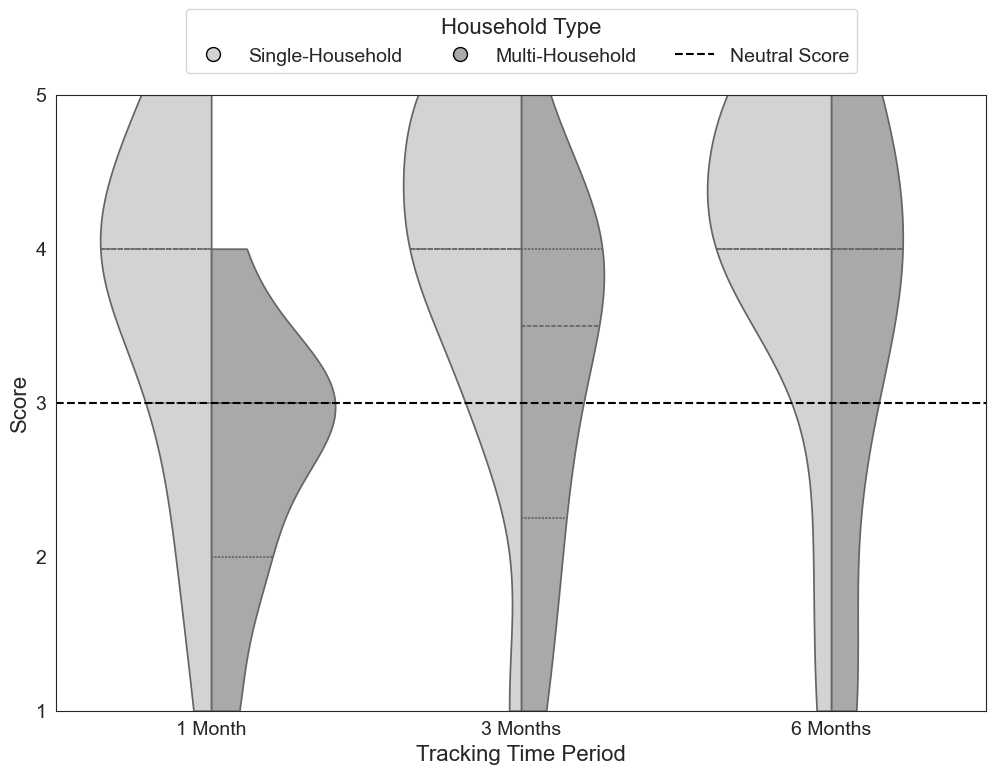

In [28]:
# Define the color palette for single and multi-households
palette = {"Single-Household": "lightgray", "Multi-Household": "darkgray"}

# Melt the df_timerange DataFrame for plotting
df_timerange_melted = df_timerange.melt(
    id_vars=["household"],
    var_name="Time Range",
    value_name="Score"
)

# Ensure that the "Score" column in df_timerange_melted is numeric
df_timerange_melted["Score"] = pd.to_numeric(df_timerange_melted["Score"], errors="coerce")

# Plot the violin plot for time ranges by household type with corrected data type
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_timerange_melted,
    x="Time Range",
    y="Score",
    hue="household",
    palette=palette,
    split=True,
    inner="quart",
    cut=0
)

# Set y-axis limits and integer ticks
plt.ylim(1, 5)
plt.yticks([1, 2, 3, 4, 5])  # Display only integer y-ticks

# Add a horizontal line at the neutral score
plt.axhline(3, color="black", linestyle="--", linewidth=1.5)

# Update x-axis labels for readability
plt.xlabel("Tracking Time Period")
plt.ylabel("Score")
plt.xticks(ticks=plt.xticks()[0], labels=[
    "1 Month", "3 Months", "6 Months"
])

# Remove duplicate legend entries and add custom legend elements
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Household Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Single-Household', markerfacecolor='lightgray', markersize=10, markeredgecolor="black"),
    Line2D([0], [0], marker='o', color='w', label='Multi-Household', markerfacecolor='darkgray', markersize=10, markeredgecolor="black"),
    Line2D([0], [0], color="black", linestyle="--", linewidth=1.5, label="Neutral Score"),
]
plt.legend(handles=legend_elements, title="Household Type", bbox_to_anchor=(0.5, 1.02), loc='lower center', ncol=3)

plt.show()

In [13]:
df_timerange

,household,"Bei einer Person, von der 1 Monat der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 3 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 6 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen"
0,Single-Household,3,4,4
1,Single-Household,4,3,2
2,Single-Household,4,5,5
3,Single-Household,2,3,4
4,Single-Household,5,5,5
5,Single-Household,3,4,4
6,Single-Household,4,5,5
7,Single-Household,4,4,4
8,Single-Household,1,1,1
9,Single-Household,4,5,5


In [14]:
df_timerange[df_timerange["household"] != "Single-Household"].describe().round(2)

,"Bei einer Person, von der 1 Monat der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 3 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 6 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen"
count,18.00,18.00,18.00
mean,2.67,3.17,3.44
std,0.84,1.15,1.38
min,1.00,1.00,1.00
25%,2.00,2.25,3.00
50%,3.00,3.50,4.00
75%,3.00,4.00,4.00
max,4.00,5.00,5.00


In [15]:
df_timerange[df_timerange["household"] != "Multi-Household"].describe().round(2)

,"Bei einer Person, von der 1 Monat der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 3 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen","Bei einer Person, von der 6 Monate der Lebensmittel-Einkaufsdaten zur Verfügung stehen"
count,18.00,18.00,18.00
mean,3.67,4.06,4.06
std,1.14,1.06,1.11
min,1.00,1.00,1.00
25%,3.00,4.00,4.00
50%,4.00,4.00,4.00
75%,4.00,5.00,5.00
max,5.00,5.00,5.00


## Use Cases

In [16]:
value_mappings = {
    "sehr unwichtig": 1, 
    "unwichtig": 2, 
    "neutral": 3, 
    "wichtig": 4, 
    "sehr wichtig": 5
}

In [17]:
# Q: Stellen Sie sich vor, Sie könnten die Lebensmittel-Einkaufsdaten Ihres Klienten der letzten 6 Monate analysieren. Wie wichtig wären Ihnen die folgenden Anwendungsfälle?

cols = ['Vergleichen und Vorschlagen alternativer Produkte zu aktuell gekauften Produkten',
       'Vorschlagen von Mahlzeitenplänen mit spezifischen Lebensmitteln',
       'Vorschlagen von Empfehlungen in standardisiertem Format (z.B. "Zuckeraufnahme aus Müsli und Getreideflocken reduzieren", "Nahrungsfasern aus Getreideprodukten erhöhen")',
       'Vorschlagen von Empfehlungen in einem Freitext Feld für weitere Ergänzungen',
       'Vergleich zwischen Ihren vergangenen Empfehlungen und den tatsächlichen Lebensmitteleinkäufen ihres Klienten',
       'Ansicht der Lebensmitteleinkäufe über die Zeit (in Form eines Diagramms oder Ernährungstagebuchs für Lebensmitteleinkäufe)']

cols_labels = [
    "Compare & Suggest\nAlternative Products",
    "Suggest Meal Plans\nwith Specific Foods",
    "Standardized\nRecommendations (e.g.,\nReduce Sugar Intake)",
    "Free Text\nRecommendations",
    "Compare Past\nRecommendations with\nActual Purchases",
    "View Purchases Over Time\n(as Graph or Journal)"
]

df_use_cases = df[cols].copy()
apply_value_mappings(df_use_cases, cols, value_mappings)
df_use_cases

/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

,Vergleichen und Vorschlagen alternativer Produkte zu aktuell gekauften Produkten,Vorschlagen von Mahlzeitenplänen mit spezifischen Lebensmitteln,"Vorschlagen von Empfehlungen in standardisiertem Format (z.B. ""Zuckeraufnahme aus Müsli und Getreideflocken reduzieren"", ""Nahrungsfasern aus Getreideprodukten erhöhen"")",Vorschlagen von Empfehlungen in einem Freitext Feld für weitere Ergänzungen,Vergleich zwischen Ihren vergangenen Empfehlungen und den tatsächlichen Lebensmitteleinkäufen ihres Klienten,Ansicht der Lebensmitteleinkäufe über die Zeit (in Form eines Diagramms oder Ernährungstagebuchs für Lebensmitteleinkäufe)
0,4,4,4,4,4,4
1,1,5,4,4,2,4
2,4,3,3,4,4,4
3,4,3,4,5,5,2
4,4,3,4,5,5,5
5,5,3,5,4,4,4
6,5,3,5,3,5,4
7,5,3,4,4,4,4
8,4,3,4,4,3,3
9,4,4,2,3,5,3


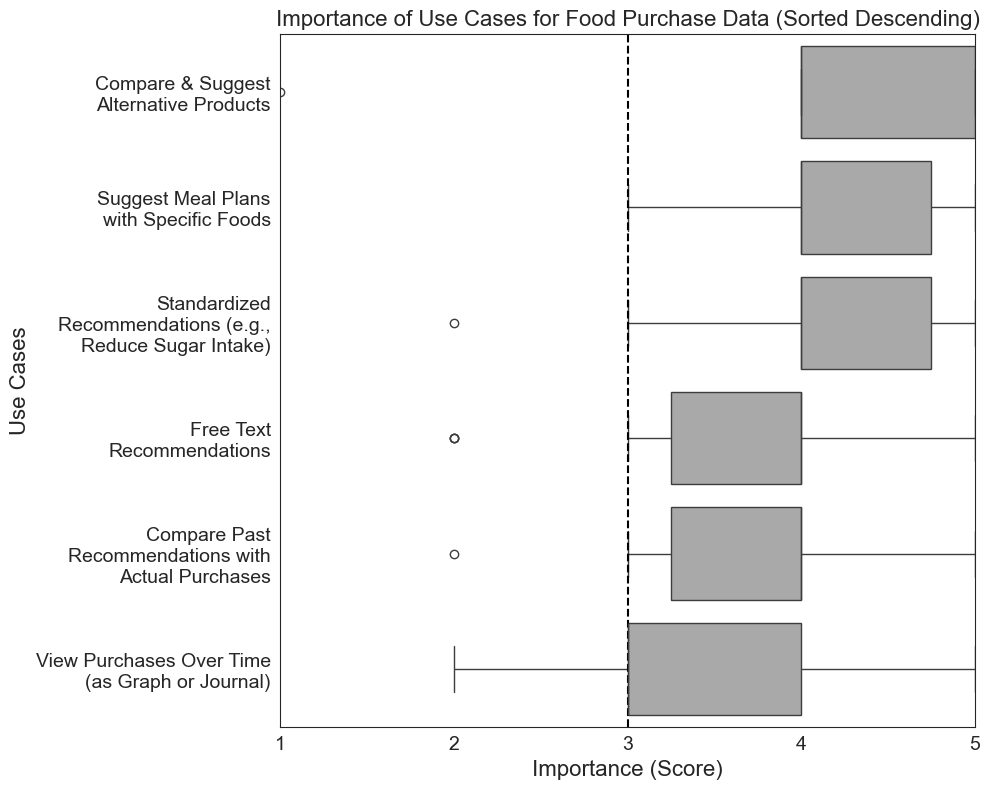

In [18]:
# Calculate the mean for each use case and sort by descending order
mean_values = df_use_cases.mean().sort_values(ascending=False)

# Re-order the columns of df_use_cases based on the sorted mean values
df_use_cases = df_use_cases[mean_values.index]
df_use_cases.columns = [cols_labels[mean_values.index.get_loc(col)] for col in df_use_cases.columns]

# Plot box plots for the specified columns
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df_use_cases, orient="h", color="#a9a9a9")

# Set x-axis limit and specify integer ticks from 1 to 5
plt.xlim(1, 5)
plt.xticks([1, 2, 3, 4, 5])

# Add a vertical line for the majority/minority cutoff at 3.5
plt.axvline(x=3.0, color='black', linestyle='--', linewidth=1.5)
# plt.text(3.6, len(mean_values) - 1, "Neutral Baseline", color='black', fontsize=14, va='center')

# Set axis labels and title
plt.xlabel("Importance (Score)")
plt.ylabel("Use Cases")
plt.title("Importance of Use Cases for Food Purchase Data (Sorted Descending)", fontsize=16)

# Automatically adjust layout for better readability
plt.tight_layout()

plt.show()

In [19]:
df_use_cases.describe().round(2)

,Compare & Suggest\nAlternative Products,Suggest Meal Plans\nwith Specific Foods,"Standardized\nRecommendations (e.g.,\nReduce Sugar Intake)",Free Text\nRecommendations,Compare Past\nRecommendations with\nActual Purchases,View Purchases Over Time\n(as Graph or Journal)
count,18.00,18.00,18.00,18.00,18.00,18.00
mean,4.17,4.11,4.06,3.78,3.78,3.39
std,0.92,0.68,0.80,1.00,0.73,0.70
min,1.00,3.00,2.00,2.00,2.00,2.00
25%,4.00,4.00,4.00,3.25,3.25,3.00
50%,4.00,4.00,4.00,4.00,4.00,3.00
75%,5.00,4.75,4.75,4.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00


## Dietary Factors

In [20]:
value_mappings = {
    "sehr unwichtig": 1, 
    "unwichtig": 2, 
    "neural": 3, 
    "wichtig": 4, 
    "sehr wichtig": 5
}

In [21]:
# Q: Bitte bewerten Sie die Wichtigkeit der folgenden Informationen für die Erstellung von Ernährungsempfehlungen basierend auf den Lebensmitteleinkäufen Ihrer KlientenRequired to answer. Likert. 

cols = ['Energieverteilung aus verschiedenen Lebensmittelkategorien',
       'Energieverteilung aus verschiedenen Makronährstoffen',
       'Makronährstoffe aus verschiedenen Lebensmittelkategorien',
       'Nahrungsfasern aus verschiedenen Lebensmittelkategorien',
       'Ratios wie z.B. das Verhältnis von tierischem zu pflanzlichem Protein  ',
       'Mikronährstoffe aus verschiedenen Lebensmittelkategorien',
       'Ausgaben aus verschiedenen Lebensmittelkategorien',
       'Lebensmitteleinkaufshistorie',
       'Rangliste der am häufigsten gekauften Lebensmittelprodukte',
       'Rangliste der am häufigsten gekauften Lebensmittelprodukte pro Lebensmittelkategorie',
       'Rangliste der Produkte mit dem größten Beitrag an Nährstoffen (z. B. Kohlenhydrate, Fette) und/oder Energie']

cols_labels = [
    "Energy Distribution\nfrom Food Categories",
    "Energy Distribution\nfrom Macronutrients",
    "Macronutrients\nfrom Food Categories",
    "Dietary Fiber\nfrom Food Categories",
    "Ratios (e.g.,\nAnimal vs. Plant Protein)",
    "Micronutrients\nfrom Food Categories",
    "Spending from\nFood Categories",
    "Purchase History",
    "Ranking of\nMost Purchased Products",
    "Ranking of Most Purchased\nProducts per Food Category",
    "Ranking of Products with\nHighest Nutrient/Energy Contribution"
]

df_dietary_factors = df[cols].copy()
apply_value_mappings(df_dietary_factors, cols, value_mappings)
df_dietary_factors

/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

,Energieverteilung aus verschiedenen Lebensmittelkategorien,Energieverteilung aus verschiedenen Makronährstoffen,Makronährstoffe aus verschiedenen Lebensmittelkategorien,Nahrungsfasern aus verschiedenen Lebensmittelkategorien,Ratios wie z.B. das Verhältnis von tierischem zu pflanzlichem Protein,Mikronährstoffe aus verschiedenen Lebensmittelkategorien,Ausgaben aus verschiedenen Lebensmittelkategorien,Lebensmitteleinkaufshistorie,Rangliste der am häufigsten gekauften Lebensmittelprodukte,Rangliste der am häufigsten gekauften Lebensmittelprodukte pro Lebensmittelkategorie,"Rangliste der Produkte mit dem größten Beitrag an Nährstoffen (z. B. Kohlenhydrate, Fette) und/oder Energie"
0,4,4,4,4,4,4,4,4,4,4,4
1,4,4,4,3,3,2,4,2,3,4,4
2,3,3,4,4,4,4,2,4,5,5,4
3,4,4,4,4,3,4,3,2,4,4,4
4,4,4,4,3,3,4,4,4,4,4,4
5,4,4,4,4,3,3,3,3,3,3,4
6,5,3,4,4,4,3,4,4,4,4,4
7,4,4,4,4,3,4,3,3,4,4,4
8,4,4,4,4,4,4,3,3,3,3,4
9,2,4,2,2,3,4,4,3,4,4,5


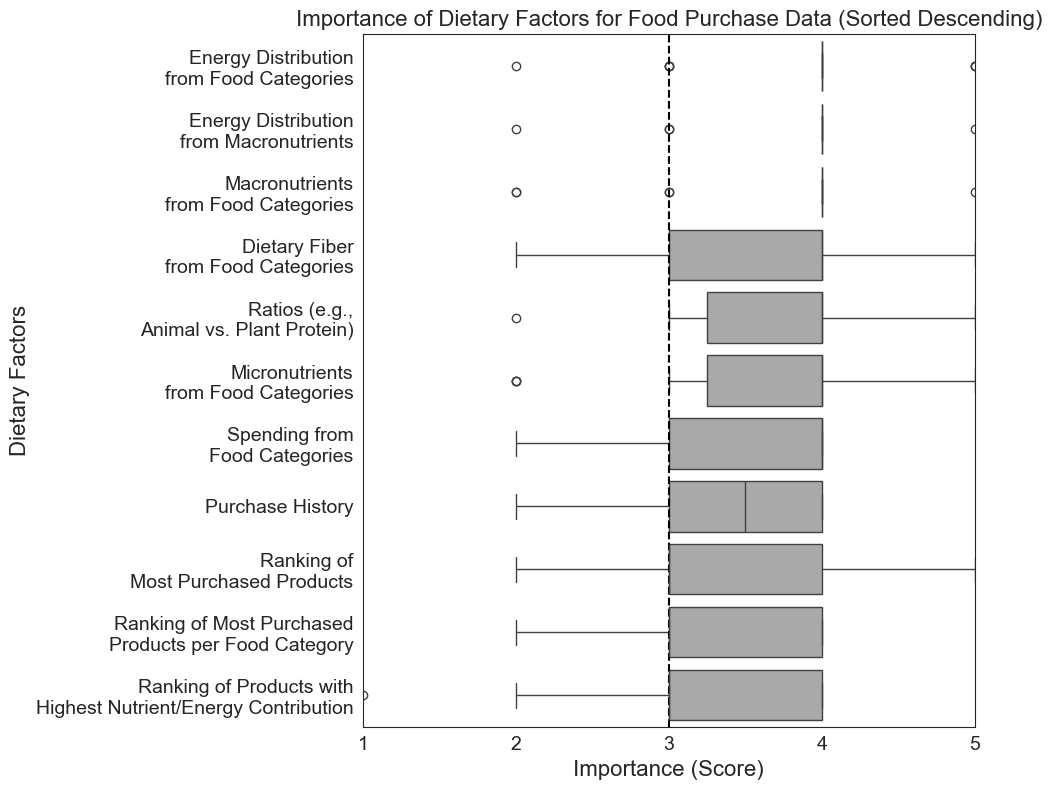

In [22]:
# Calculate the mean for each use case and sort by descending order
mean_values = df_dietary_factors.mean().sort_values(ascending=False)

# Re-order the columns of df_use_cases based on the sorted mean values
df_dietary_factors = df_dietary_factors[mean_values.index]
df_dietary_factors.columns = [cols_labels[mean_values.index.get_loc(col)] for col in df_dietary_factors.columns]

# Plot box plots for the specified columns
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df_dietary_factors, orient="h", color="#a9a9a9")

# Set x-axis limit and specify integer ticks from 1 to 5
plt.xlim(1, 5)
plt.xticks([1, 2, 3, 4, 5])

# Add a vertical line for the majority/minority cutoff at 3.5
plt.axvline(x=3.0, color='black', linestyle='--', linewidth=1.5)
# plt.text(3.6, len(mean_values) - 1, "Neutral Baseline", color='black', fontsize=14, va='center')

# Set axis labels and title
plt.xlabel("Importance (Score)")
plt.ylabel("Dietary Factors")
plt.title("Importance of Dietary Factors for Food Purchase Data (Sorted Descending)", fontsize=16)

# Automatically adjust layout for better readability
plt.tight_layout()

plt.show()

In [23]:
df_dietary_factors.describe().round(2)

,Energy Distribution\nfrom Food Categories,Energy Distribution\nfrom Macronutrients,Macronutrients\nfrom Food Categories,Dietary Fiber\nfrom Food Categories,"Ratios (e.g.,\nAnimal vs. Plant Protein)",Micronutrients\nfrom Food Categories,Spending from\nFood Categories,Purchase History,Ranking of\nMost Purchased Products,Ranking of Most Purchased\nProducts per Food Category,Ranking of Products with\nHighest Nutrient/Energy Contribution
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,3.89,3.83,3.72,3.72,3.72,3.67,3.50,3.39,3.33,3.17,3.11
std,0.76,0.62,0.75,0.75,0.67,0.91,0.62,0.70,0.84,0.71,0.90
min,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00
25%,4.00,4.00,4.00,3.00,3.25,3.25,3.00,3.00,3.00,3.00,3.00
50%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.50,3.00,3.00,3.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,4.00,4.00,5.00,4.00,4.00


## Food Product Information

In [24]:
value_mappings = {
    "sehr unwichtig": 1, 
    "unwichtig": 2, 
    "neutral": 3, 
    "wichtig": 4, 
    "sehr wichtig": 5
}

In [25]:
# Q: Bitte bewerten Sie die Wichtigkeit der folgenden Informationen für die Empfehlung spezifischer Lebensmittel

cols = ['Energiegehalt des Produkts  ', 'Makronährstoffgehalt des Produkts  ',
       'Mikronährstoffgehalt des Produkts  ',
       'Nahrungsfasergehalt des Produkts  ', 'Gehalt an zugesetztem Zucker  ',
       'Allergene in der Zutatenliste', 'Gesamte Zutatenliste',
       'Preis pro Produkt', 'Preis pro 100g/100ml Produkt', 'Produktgröße',
       'Nutri-Score',
       'NOVA-Score (zur Angabe des Verarbeitungsgrads der Produkte)',
       'Nachhaltigkeitsinformationen, z. B. CO2-Emissionen ']

cols_labels = [
    "Energy Content\nof Product",
    "Macronutrient Content\nof Product",
    "Micronutrient Content\nof Product",
    "Dietary Fiber Content\nof Product",
    "Added Sugar Content",
    "Allergens in\nIngredient List",
    "Full Ingredient List",
    "Price per Product",
    "Price per 100g/100ml",
    "Product Size",
    "Nutri-Score",
    "NOVA-Score\n(Degree of Processing)",
    "Sustainability Info\n(e.g., CO2 Emissions)"
]

df_food_product_info = df[cols].copy()
apply_value_mappings(df_food_product_info, cols, value_mappings)
df_food_product_info

/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey_df[col] = survey_df[col].replace(value_mappings)
/var/folders/dh/_vsmsfp51n7gfdn_t9c8kb7r0000gn/T/ipykernel_19264/3266093576.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

,Energiegehalt des Produkts,Makronährstoffgehalt des Produkts,Mikronährstoffgehalt des Produkts,Nahrungsfasergehalt des Produkts,Gehalt an zugesetztem Zucker,Allergene in der Zutatenliste,Gesamte Zutatenliste,Preis pro Produkt,Preis pro 100g/100ml Produkt,Produktgröße,Nutri-Score,NOVA-Score (zur Angabe des Verarbeitungsgrads der Produkte),"Nachhaltigkeitsinformationen, z. B. CO2-Emissionen"
0,4,4,3,4,4,3,4,2,2,3,3,4,4
1,4,4,3,4,4,4,4,4,4,4,1,1,4
2,4,4,4,4,3,4,3,3,4,4,1,3,5
3,5,5,5,5,5,5,5,5,5,5,3,4,4
4,5,5,4,4,3,3,5,2,2,5,2,3,2
5,5,5,3,4,4,4,4,3,3,4,1,3,3
6,5,5,3,4,5,3,5,4,4,3,3,3,3
7,5,4,4,4,4,3,2,3,3,4,3,3,3
8,4,4,2,4,4,4,4,4,3,4,1,3,3
9,5,5,3,3,3,3,4,2,1,2,1,1,2


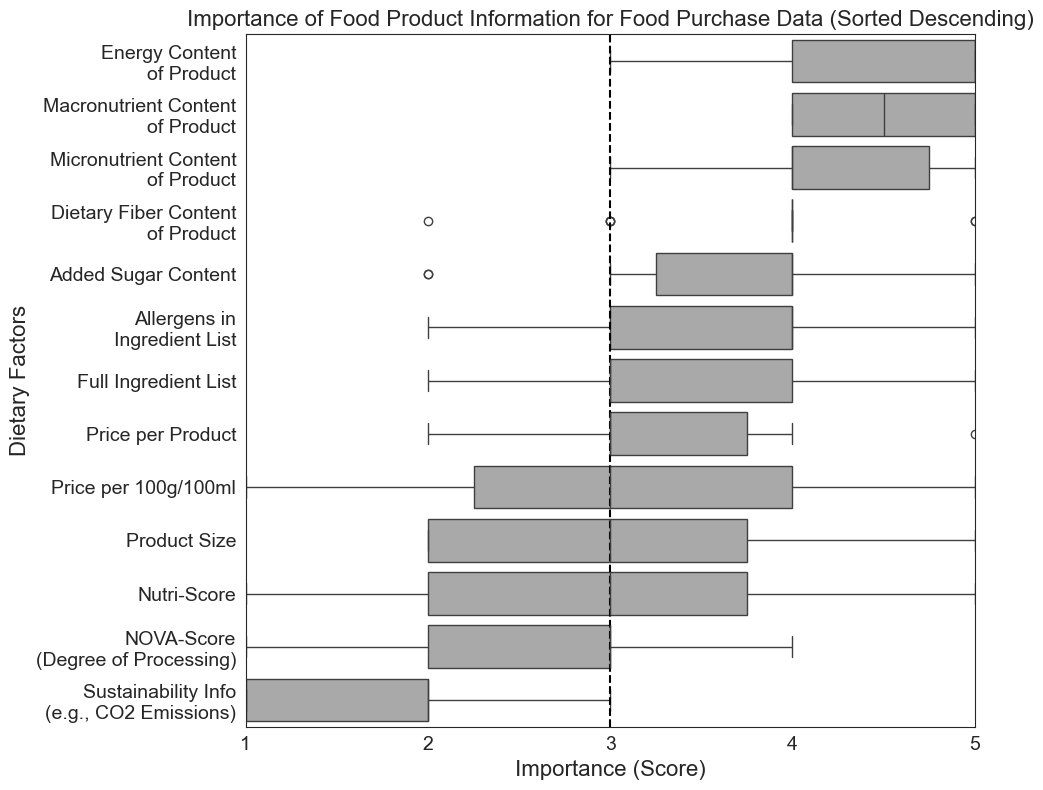

In [26]:
# Calculate the mean for each use case and sort by descending order
mean_values = df_food_product_info.mean().sort_values(ascending=False)

# Re-order the columns of df_use_cases based on the sorted mean values
df_food_product_info = df_food_product_info[mean_values.index]
df_food_product_info.columns = [cols_labels[mean_values.index.get_loc(col)] for col in df_food_product_info.columns]

# Plot box plots for the specified columns
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df_food_product_info, orient="h", color="#a9a9a9")

# Set x-axis limit and specify integer ticks from 1 to 5
plt.xlim(1, 5)
plt.xticks([1, 2, 3, 4, 5])

# Add a vertical line for the majority/minority cutoff at 3.5
plt.axvline(x=3.0, color='black', linestyle='--', linewidth=1.5)
# plt.text(3.6, len(mean_values) - 1, "Neutral Baseline", color='black', fontsize=14, va='center')

# Set axis labels and title
plt.xlabel("Importance (Score)")
plt.ylabel("Dietary Factors")
plt.title("Importance of Food Product Information for Food Purchase Data (Sorted Descending)", fontsize=16)

# Automatically adjust layout for better readability
plt.tight_layout()

plt.show()

In [27]:
df_food_product_info.describe().round(2)

,Energy Content\nof Product,Macronutrient Content\nof Product,Micronutrient Content\nof Product,Dietary Fiber Content\nof Product,Added Sugar Content,Allergens in\nIngredient List,Full Ingredient List,Price per Product,Price per 100g/100ml,Product Size,Nutri-Score,NOVA-Score\n(Degree of Processing),"Sustainability Info\n(e.g., CO2 Emissions)"
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,4.56,4.50,4.11,3.83,3.78,3.72,3.39,3.17,3.11,3.00,2.94,2.78,1.83
std,0.62,0.51,0.68,0.71,0.88,0.89,0.92,0.79,1.08,0.91,1.00,0.94,0.79
min,3.00,4.00,3.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,1.00
25%,4.00,4.00,4.00,4.00,3.25,3.00,3.00,3.00,2.25,2.00,2.00,2.00,1.00
50%,5.00,4.50,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00
75%,5.00,5.00,4.75,4.00,4.00,4.00,4.00,3.75,4.00,3.75,3.75,3.00,2.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,3.00
